# Descripción de Relaciones y Predicciones #



Descripción archivos "breast-level_annotations.csv" y "finding_annotations.csv"

- brest-level_annotations.csv: Muestra el diagnóstico final de cada mama (2000 en total)
- finding_annotations.csv: Muestra todos los hallazgos individualmente

Vemos una separación de 4.000 exámenes de entrenamiento y 1.000 de testeo. Por examen tenemos 2 tomas por mama derecha o izquierda y de esta 2 con tomas CC o MLO.

### Descripción de Bi-Rads (Breast Imaging Reporting and Data System) ###

- 0: No concluyente, deben realizarse más estudios para llegar a un diagnóstico final que en la mayoría de los casos la conclusión es normal o benigno.

- 1: Mama normal (negativo), los senos lucen simétricos, no hay masas, estructuras distorsionadas, o calcificaciones que causen sospechas.

- 2: Hallazgo benigno, se considera negativo respecto al cáncer, pero hay hallazgo de una masa o abultamiento no canceroso. También puede señalar cambios en una biopsia.

- 3: Hallazgo que puede ser benigno (seguimiento), el resultado en esta categoría tiene una probabilidad muy baja (menor a 2%), se recomienda seguimiento.

- 4: Hallazgo de una anomalía sospechosa en el resultado, hay una sospecha para recomendar una biopsia. Los hallazgos tiene un alto nivel de sospecha.

- 5: Sugerencia de un hallazgo maligno, hay una alta probabilidad de cáncer (95% aprox.), se recomienda una biopsia.

- 6: Hallazgo de malignidad, esta categoría se utiliza únicamente para hallazgos en un mamograma que ya se ha demostrado canceroso según una biopsia.

Fuente: https://www.cancer.org/es/cancer/tipos/cancer-de-seno/pruebas-de-deteccion-y-deteccion-temprana-del-cancer-de-seno/mamogramas/como-entender-su-informe-de-mamograma.html

Podemos ver que se omiten las clasificaciones "0" y "6", la primera debido a que no 

In [2]:
import pandas as pd
import ast
import matplotlib.pyplot as plt

In [76]:
archivo = 'finding_annotations.csv'
df = pd.read_csv(archivo)

archivo2 = 'breast-level_annotations.csv'
bla = pd.read_csv(archivo2)

def safe_literal_eval(value):
    try:
        return ast.literal_eval(value)
    except (ValueError, SyntaxError):
        return value

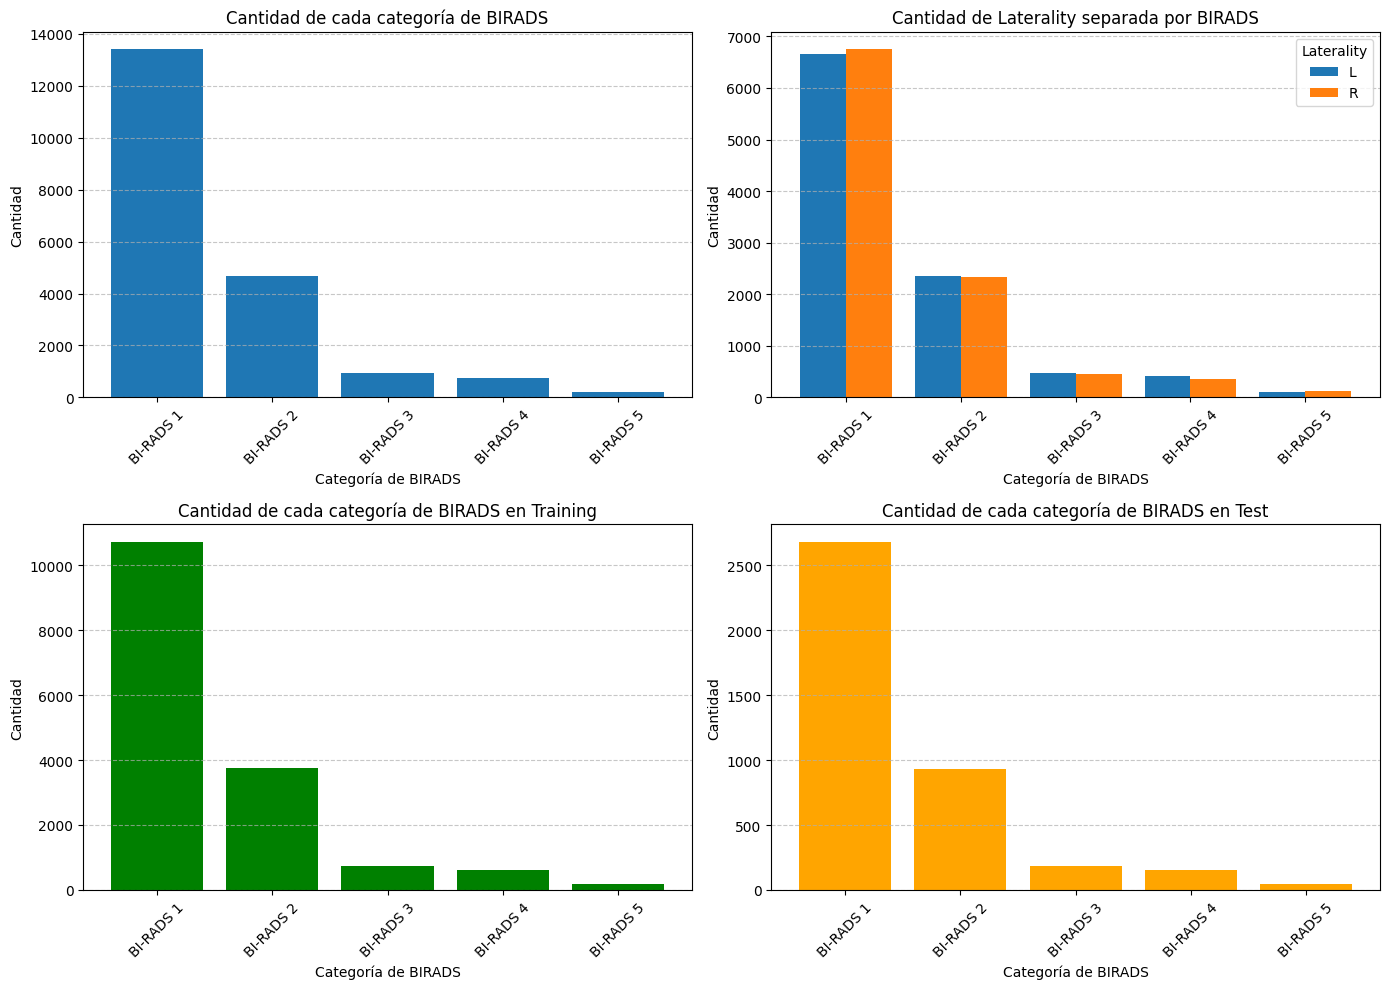

In [25]:
# Configuración de gráficos
fig, axs = plt.subplots(2, 2, figsize=(14, 10))

# 1
frecuencias_birads = bla['breast_birads'].value_counts()
axs[0, 0].bar(frecuencias_birads.index, frecuencias_birads.values)
axs[0, 0].set_title('Cantidad de cada categoría de BIRADS')
axs[0, 0].set_xlabel('Categoría de BIRADS')
axs[0, 0].set_ylabel('Cantidad')
axs[0, 0].tick_params(axis='x', rotation=45)
axs[0, 0].grid(axis='y', linestyle='--', alpha=0.7)

# 2
breast_birads_unique = bla['breast_birads'].unique()
laterality_birads = bla.groupby(['breast_birads', 'laterality']).size().unstack().reindex(columns=bla['laterality'].unique(), fill_value=0)
laterality_birads.plot(kind='bar', ax=axs[0, 1], width=0.8)
axs[0, 1].set_title('Cantidad de Laterality separada por BIRADS')
axs[0, 1].set_xlabel('Categoría de BIRADS')
axs[0, 1].set_ylabel('Cantidad')
axs[0, 1].tick_params(axis='x', rotation=45)
axs[0, 1].legend(title='Laterality')
axs[0, 1].grid(axis='y', linestyle='--', alpha=0.7)

# 3
training_data = bla[bla['split'] == 'training']
frecuencias_birads_training = training_data['breast_birads'].value_counts()
axs[1, 0].bar(frecuencias_birads_training.index, frecuencias_birads_training.values, color='green')
axs[1, 0].set_title('Cantidad de cada categoría de BIRADS en Training')
axs[1, 0].set_xlabel('Categoría de BIRADS')
axs[1, 0].set_ylabel('Cantidad')
axs[1, 0].tick_params(axis='x', rotation=45)
axs[1, 0].grid(axis='y', linestyle='--', alpha=0.7)

# 4
test_data = bla[bla['split'] == 'test']
frecuencias_birads_test = test_data['breast_birads'].value_counts()
axs[1, 1].bar(frecuencias_birads_test.index, frecuencias_birads_test.values, color='orange')
axs[1, 1].set_title('Cantidad de cada categoría de BIRADS en Test')
axs[1, 1].set_xlabel('Categoría de BIRADS')
axs[1, 1].set_ylabel('Cantidad')
axs[1, 1].tick_params(axis='x', rotation=45)
axs[1, 1].grid(axis='y', linestyle='--', alpha=0.7)


plt.tight_layout()
plt.show()

#### Relación de las casillas "breast_birads" y "finding_birads" en "findins_annotations.csv" ####

In [26]:
coincidencias = (df['finding_birads'] == df['breast_birads']).sum()
no_coincidencias = (df['finding_birads'] != df['breast_birads']).sum()
print(f'En "findins_annotations.csv"')
print(f'Cantidad de filas con coincidencias: {coincidencias}')
print(f'Cantidad de filas con no coincidencias: {no_coincidencias}')

En "findins_annotations.csv"
Cantidad de filas con coincidencias: 1952
Cantidad de filas con no coincidencias: 18534


#### Relación de BI-RADS detectados por cada BI-RADS diagnosticado ####

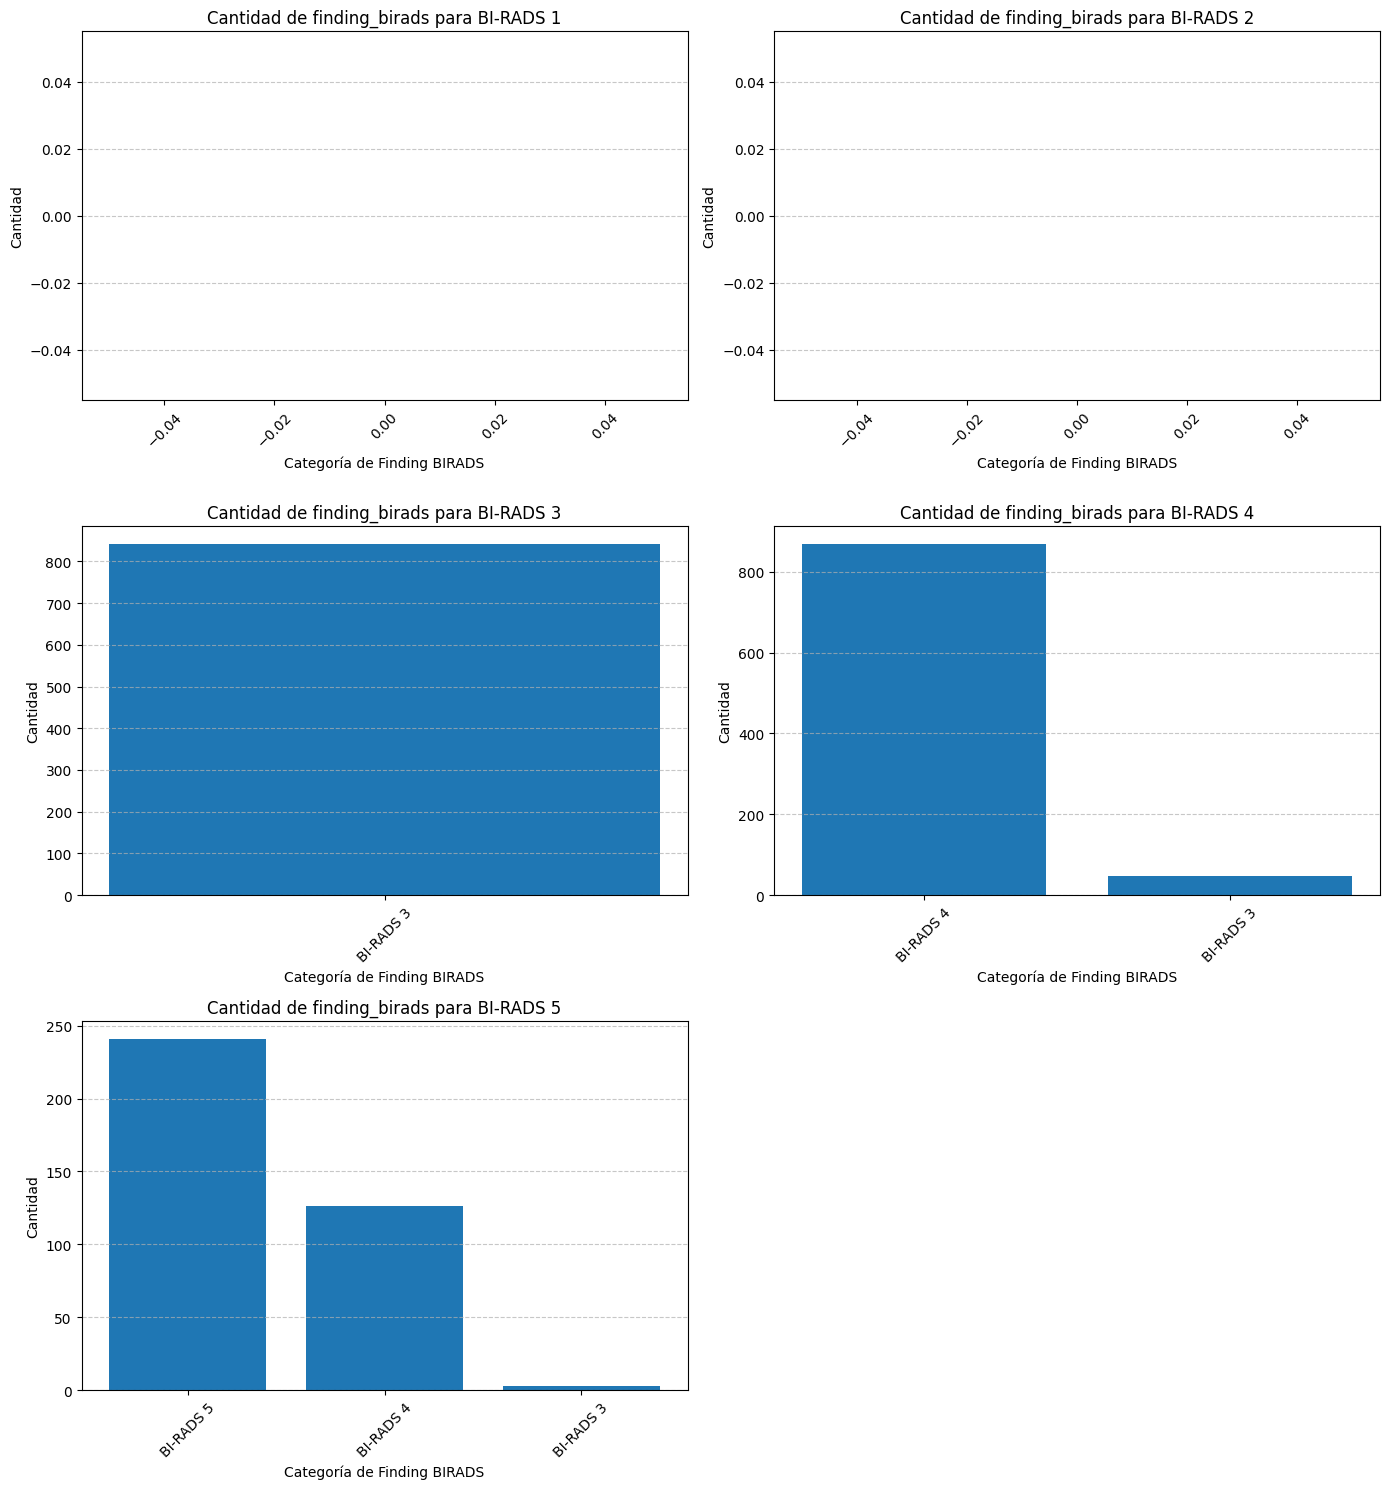

In [34]:
lista_birads = ['BI-RADS 1', 'BI-RADS 2', 'BI-RADS 3', 'BI-RADS 4', 'BI-RADS 5']

fig, axs = plt.subplots(3, 2, figsize=(14, 15))
axs = axs.flatten()  # Aplanar el array de ejes para iterar fácilmente

for i, birads_value in enumerate(lista_birads):
    subset = df[df['breast_birads'] == birads_value]
    finding_birads_counts = subset['finding_birads'].value_counts()
    
    axs[i].bar(finding_birads_counts.index, finding_birads_counts.values)
    axs[i].set_title(f'Cantidad de finding_birads para {birads_value}')
    axs[i].set_xlabel('Categoría de Finding BIRADS')
    axs[i].set_ylabel('Cantidad')
    axs[i].tick_params(axis='x', rotation=45)
    axs[i].grid(axis='y', linestyle='--', alpha=0.7)

fig.delaxes(axs[5])
plt.tight_layout()
plt.show()

**Obs:**  Podemos observar que solo en las categorías BI-RADS 3, BI-RADS 4 y BI-RADS 5 hay más de una elemento de otra categoría y que no hay elementos de una categoría mayor.

### Relación por Mama ###

Para diagnosticar una mama se debe tener en consideración ambos tipos de mamografías, la MLO (medio-lateral oblicua) y CC (cráneo-caudal), y este diagnóstico debería ser el mismo para ambas imágenes. 

In [41]:
df_sorted = bla[['study_id', 'laterality', 'breast_birads', 'view_position']].sort_values(by='study_id')


total_coincidencias = 0
total_no_coincidencias = 0
detalles_no_coincidencias = []

grouped = df_sorted.groupby(['study_id', 'laterality'])

for (study_id, laterality), group in grouped:

    cc_birads = set(group[group['view_position'] == 'CC']['breast_birads'])
    mlo_birads = set(group[group['view_position'] == 'MLO']['breast_birads'])
    
    coincidencias = len(cc_birads & mlo_birads)
    no_coincidencias = len((cc_birads - mlo_birads) | (mlo_birads - cc_birads))
    
    total_coincidencias += coincidencias
    total_no_coincidencias += no_coincidencias

    if no_coincidencias > 0:

        no_coincide_cc = group[(group['view_position'] == 'CC') & (~group['breast_birads'].isin(mlo_birads))]
        no_coincide_mlo = group[(group['view_position'] == 'MLO') & (~group['breast_birads'].isin(cc_birads))]

        detalles_no_coincidencias.extend(no_coincide_cc.to_dict('records'))
        detalles_no_coincidencias.extend(no_coincide_mlo.to_dict('records'))


df_detalles_no_coincidencias = pd.DataFrame(detalles_no_coincidencias)

print(f'Cantidad de exámenes que tienen el mismo diagnóstico en MLO y CC por mama. \n')


print(f"Total de coincidencias: {total_coincidencias}")
print(f"Total de no coincidencias: {total_no_coincidencias}")


print("\nDetalles de no coincidencias:")
print(df_detalles_no_coincidencias[['study_id', 'laterality', 'breast_birads', 'view_position']])

Cantidad de exámenes que tienen el mismo diagnóstico en MLO y CC por mama. 

Total de coincidencias: 9999
Total de no coincidencias: 1

Detalles de no coincidencias:
                           study_id laterality breast_birads view_position
0  dbca9d28baa3207b3187c4d07dc81a80          L     BI-RADS 2            CC
1  dbca9d28baa3207b3187c4d07dc81a80          L     BI-RADS 2            CC


### Relación BI-RADS por Mama ###

Como vimos anteriormente, solo hay más de una clasificación en los BI-RADS 3, 4 y 5, entonces acotaremos nuestra muestra a estos datos.

In [38]:
bla_filtered = bla[bla['breast_birads'].isin(['BI-RADS 3', 'BI-RADS 4', 'BI-RADS 5'])]
print(f'Cantidad de Mamas con BI-RADS mayor a 3: {len(bla_filtered)}')

df_filtered = df[df['breast_birads'].isin(['BI-RADS 3', 'BI-RADS 4', 'BI-RADS 5'])]
print(f'Cantidad de Anotaciones con BI-RADS mayor a 3: {len(df_filtered)}')


Cantidad de Mamas con BI-RADS mayor a 3: 1918
Cantidad de Anotaciones con BI-RADS mayor a 3: 2404


In [43]:
def convertir_birads(birads_str):
    try:
        return int(birads_str.split()[-1])
    except (ValueError, AttributeError):
        return None

df_filtered = df[df['breast_birads'].isin(['BI-RADS 3', 'BI-RADS 4', 'BI-RADS 5'])].copy()

# Convertir las columnas breast_birads y finding_birads a valores numéricos usando .loc
df_filtered.loc[:, 'breast_birads_num'] = df_filtered['breast_birads'].apply(convertir_birads)
df_filtered.loc[:, 'finding_birads_num'] = df_filtered['finding_birads'].apply(convertir_birads)

# Inicializar contadores
total_coincidencias = 0
total_no_coincidencias = 0
detalles_no_coincidencias = []

# Agrupar por estudio y laterality
grouped = df_filtered.groupby(['study_id', 'laterality'])

for (study_id, laterality), group in grouped:
    # Obtener el valor máximo en finding_birads
    max_finding_birads = group['finding_birads_num'].max()
    
    # Obtener el valor de breast_birads
    breast_birads_value = group['breast_birads_num'].iloc[0]  # Asumiendo que es el mismo para todo el grupo
    
    # Comparar si breast_birads es igual al máximo de finding_birads
    if breast_birads_value == max_finding_birads:
        total_coincidencias += 1
    else:
        total_no_coincidencias += 1
        # Añadir detalles a la lista de no coincidencias
        detalles_no_coincidencias.append({
            'study_id': study_id,
            'laterality': laterality,
            'breast_birads': breast_birads_value,
            'max_finding_birads': max_finding_birads
        })

# Crear DataFrame para los detalles de no coincidencias
df_detalles_no_coincidencias = pd.DataFrame(detalles_no_coincidencias)

print(f'Cantidad de mamas que el diagnóstico de la mama es el mayor valor de finding_birads \n')

# Mostrar el conteo total de coincidencias y no coincidencias
print(f"Total de coincidencias: {total_coincidencias}")
print(f"Total de no coincidencias: {total_no_coincidencias}")

# Mostrar los detalles de las no coincidencias
print("\nDetalles de no coincidencias:")
print(df_detalles_no_coincidencias['study_id'])

Cantidad de mamas que el diagnóstico de la mama es el mayor valor de finding_birads 

Total de coincidencias: 958
Total de no coincidencias: 1

Detalles de no coincidencias:
0    e6a3e149e9af887c6f26074601676a3f
Name: study_id, dtype: object


Obs: Podemos asumir que el valor que se toma en el BI-RADS es el máximo encontrado, el caso que no es coincidente es porque se hizo una detección de un Suspicious Lymph Node.

### Descripción de los Sintomas a encontrar ###

- Architectural Distortion: Generalmente, se clasifica como BI-RADS 4, ya que es una anormalidad sospechosa que puede indicar malignidad.

- Focal Asymmetry: Puede ser BI-RADS 3 (probablemente benigno) si no hay otras características sospechosas.

- Global Asymmetry: Normalmente, es una variante benigna, pero puede requerir más evaluación si está asociada con una anormalidad palpable.

- Mass: Dependiendo de las características de la masa (bordes, forma, etc.), puede clasificarse desde BI-RADS 3 (probablemente benigno) hasta BI-RADS 5 (altamente sugestiva de malignidad).

- Nipple Retraction: Puede ser un signo de malignidad y generalmente se clasifica como BI-RADS 4 o 5.

- No Finding: Se clasifica como BI-RADS 1 o 2 (negativo).

- Skin Retraction: Similar a la retracción del pezón, puede ser un signo de malignidad y se clasifica como BI-RADS 4 o 5.

- Skin Thickening: Puede ser un signo de malignidad y se clasifica como BI-RADS 4 o 5.

- Suspicious Calcification: Dependiendo de la morfología y distribución, puede ser clasificada como BI-RADS 4 o 5.

- Suspicious Lymph Node: Puede ser un signo de malignidad y se clasifica como BI-RADS 4 o 5.


### *Sobre el Data Set* ###

Se clasifican como categorías anormales las siguientes: Mass, Calcificaction, Asymmetries y  Architectural Distortion, todas asociadas a BI-Rads. 

Los hallazgos clasificados como BI-RADS 2, que son considerados benignos (no cancerosos), no se marcaron en este estudio. Esto significa que solo se anotaron los hallazgos que tienen una mayor probabilidad de ser malignos o que requieren un seguimiento adicional.


In [7]:
df['finding_categories'] = df['finding_categories'].apply(safe_literal_eval)
todas_categorias = [categoria for sublista in df['finding_categories'] for categoria in sublista]
categoria_unica = sorted(set(todas_categorias))

print('Categorías: \n')
for categoria in categoria_unica:
    print(categoria)

Categorías: 

Architectural Distortion
Asymmetry
Focal Asymmetry
Global Asymmetry
Mass
Nipple Retraction
No Finding
Skin Retraction
Skin Thickening
Suspicious Calcification
Suspicious Lymph Node


In [8]:
df['finding_categories'] = df['finding_categories'].apply(lambda x: x if isinstance(x, list) else [x])

df_exploded = df.explode('finding_categories')

frecuencia_categorias = pd.crosstab(df_exploded['finding_categories'], df_exploded['breast_birads'])

# Asegúrate de que 'No Finding' esté en la columna 'finding_categories'
no_finding_frecuencia = frecuencia_categorias.loc['No Finding']

# Imprime los resultados
print("Frecuencia de 'No Finding':\n")
print(no_finding_frecuencia)


Frecuencia de 'No Finding':

breast_birads
BI-RADS 1    13406
BI-RADS 2     4664
BI-RADS 3      126
BI-RADS 4       34
BI-RADS 5        2
Name: No Finding, dtype: int64


Como vimos anteriormente, puede no haber una detección, pero si llega una clasificación mayor, esta predominará, además puede haber múltiples detecciones en una área.



#### *Clasificación* ####

Clasificaremos los síntomas en 3 categorías, excluyendo los 'No Finding' que vimos con anterioridad: 

1. Hallazgos Normales: (Nipple Retraction, Skin Retraction, Skin Thickening) Estos son Hallazgos considerados benignos, en su mayoría BI-RADS 2. Estos no tienen datos en finding_birads, ya que no son de mayor preocupación, si es que están por si solos.
2. Hallazgos Anormales: (Mass, Architectural Distortion, Asymetry y Calcification)
3. Sospecha: (Suspicious Lymph Node), este sugiere una posible preocupación.



In [1]:
normal_findings = ['Nipple Retraction',
 'Skin Retraction',
 'Skin Thickening']

anormal_findings = ['Architectural Distortion',
 'Asymmetry',
 'Focal Asymmetry',
 'Global Asymmetry',
 'Mass',
 'Suspicious Calcification']

sus = ['Suspicious Lymph Node']

finding = normal_findings + sus


#### Parte 1: Hallazgos normales ####

Como vimos, estos no tienen una relación en 'finding_birads', son asociados a BI-RADS 2. Por lo que ya sabemos su relación.

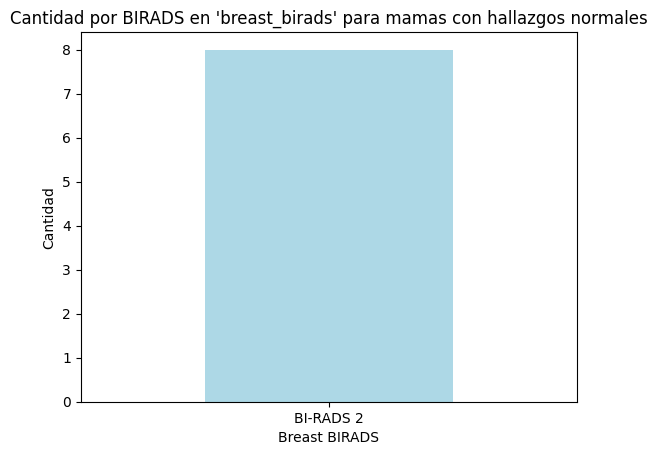

In [133]:
grouped = df.groupby(['study_id', 'laterality'])

# Lista para almacenar los índices de las mamas que cumplen con el criterio
indices_filtrados = []

for (study_id, laterality), group in grouped:
    # Verificar si todas las categorías de 'finding_categories' en el grupo están en 'normal_findings'
    if group['finding_categories'].apply(lambda x: set(x).issubset(set(normal_findings))).all():
        indices_filtrados.extend(group.index)

# Crear un DataFrame filtrado con los índices obtenidos
df_filtrado = df.loc[indices_filtrados]

# Contar las ocurrencias de cada valor de 'breast_birads'
conteo_birads = df_filtrado['breast_birads'].value_counts().sort_index()

# Graficar los resultados
conteo_birads.plot(kind='bar', color='lightblue')
plt.title("Cantidad por BIRADS en 'breast_birads' para mamas con hallazgos normales")
plt.xlabel("Breast BIRADS")
plt.ylabel("Cantidad")
plt.xticks(rotation=0)
plt.show()

#### Parte 2: Hallazgo sospechoso ####


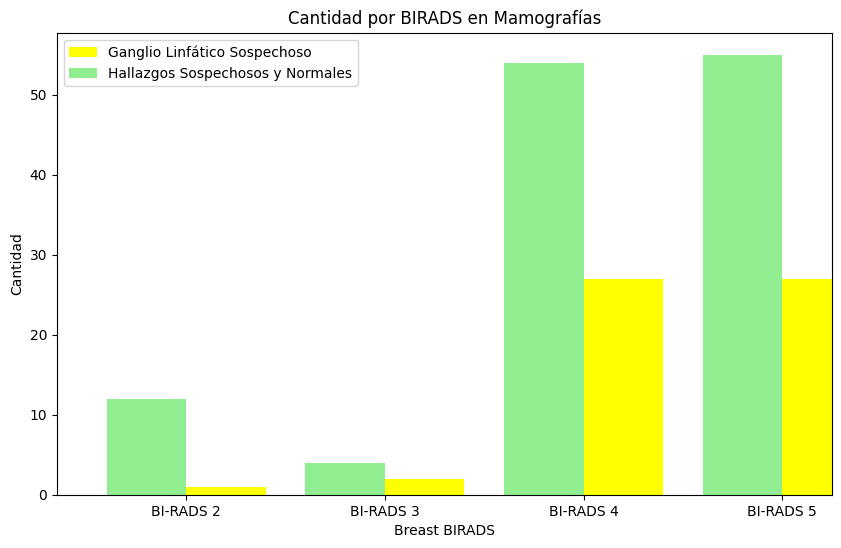

In [51]:
# Filtrar y contar para "Ganglio Linfático Sospechoso"
df_filtrado_sospechoso = df[df['finding_categories'].apply(lambda x: set(x).issubset(set(sus)))]
if not df_filtrado_sospechoso.empty:
    conteo_birads_sospechoso = df_filtrado_sospechoso['breast_birads'].value_counts().sort_index()

# Filtrar y contar para "hallazgos específicos"
df_filtrado_hallazgos = df[df['finding_categories'].apply(lambda x: set(x).issubset(set(finding)))]
if not df_filtrado_hallazgos.empty:
    conteo_birads_hallazgos = df_filtrado_hallazgos['breast_birads'].value_counts().sort_index()

# Crear el gráfico combinado
plt.figure(figsize=(10, 6))
if not df_filtrado_sospechoso.empty:
    conteo_birads_sospechoso.plot(kind='bar', color='yellow', position=0, width=0.4, label="Ganglio Linfático Sospechoso")

if not df_filtrado_hallazgos.empty:
    conteo_birads_hallazgos.plot(kind='bar', color='lightgreen', position=1, width=0.4, label="Hallazgos Sospechosos y Normales")

plt.title("Cantidad por BIRADS en Mamografías")
plt.xlabel("Breast BIRADS")
plt.ylabel("Cantidad")
plt.xticks(rotation=0)
plt.legend()
plt.show()


Podemos observar que no es un sintoma menor, ya que si solo esta presente vemos que tiene mayor presencia en BI-Rads 4 y 5.

#### Parte 3: Hallazgos anormales ####

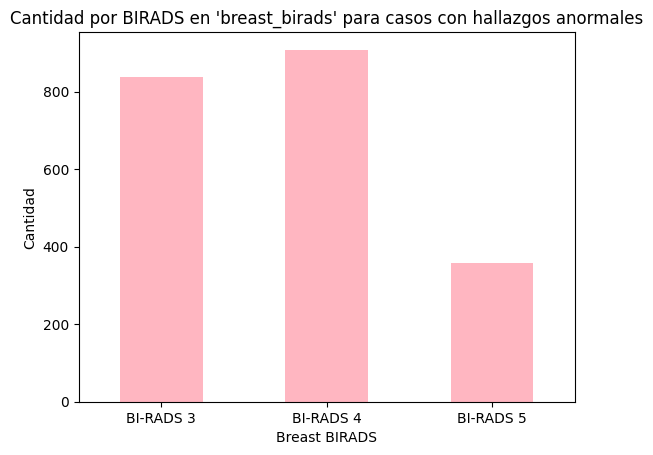

In [56]:
# Filtrar el DataFrame para incluir solo las filas donde 'finding_categories' contiene únicamente elementos de normal_findings
df_anormal = df[df['finding_categories'].apply(lambda x: set(x).issubset(set(anormal_findings)))]

# Verificar si df_normal no está vacío
if not df_anormal.empty:
    # Contar las ocurrencias en 'breast_birads'
    conteo_birads = df_anormal['breast_birads'].value_counts().sort_index()

    # Graficar los resultados
    conteo_birads.plot(kind='bar', color='lightpink')
    plt.title("Cantidad por BIRADS en 'breast_birads' para casos con hallazgos anormales")
    plt.xlabel("Breast BIRADS")
    plt.ylabel("Cantidad")
    plt.xticks(rotation=0)
    plt.show()
else:
    print("No se encontraron casos donde 'finding_categories' contenga exclusivamente hallazgos normales.")


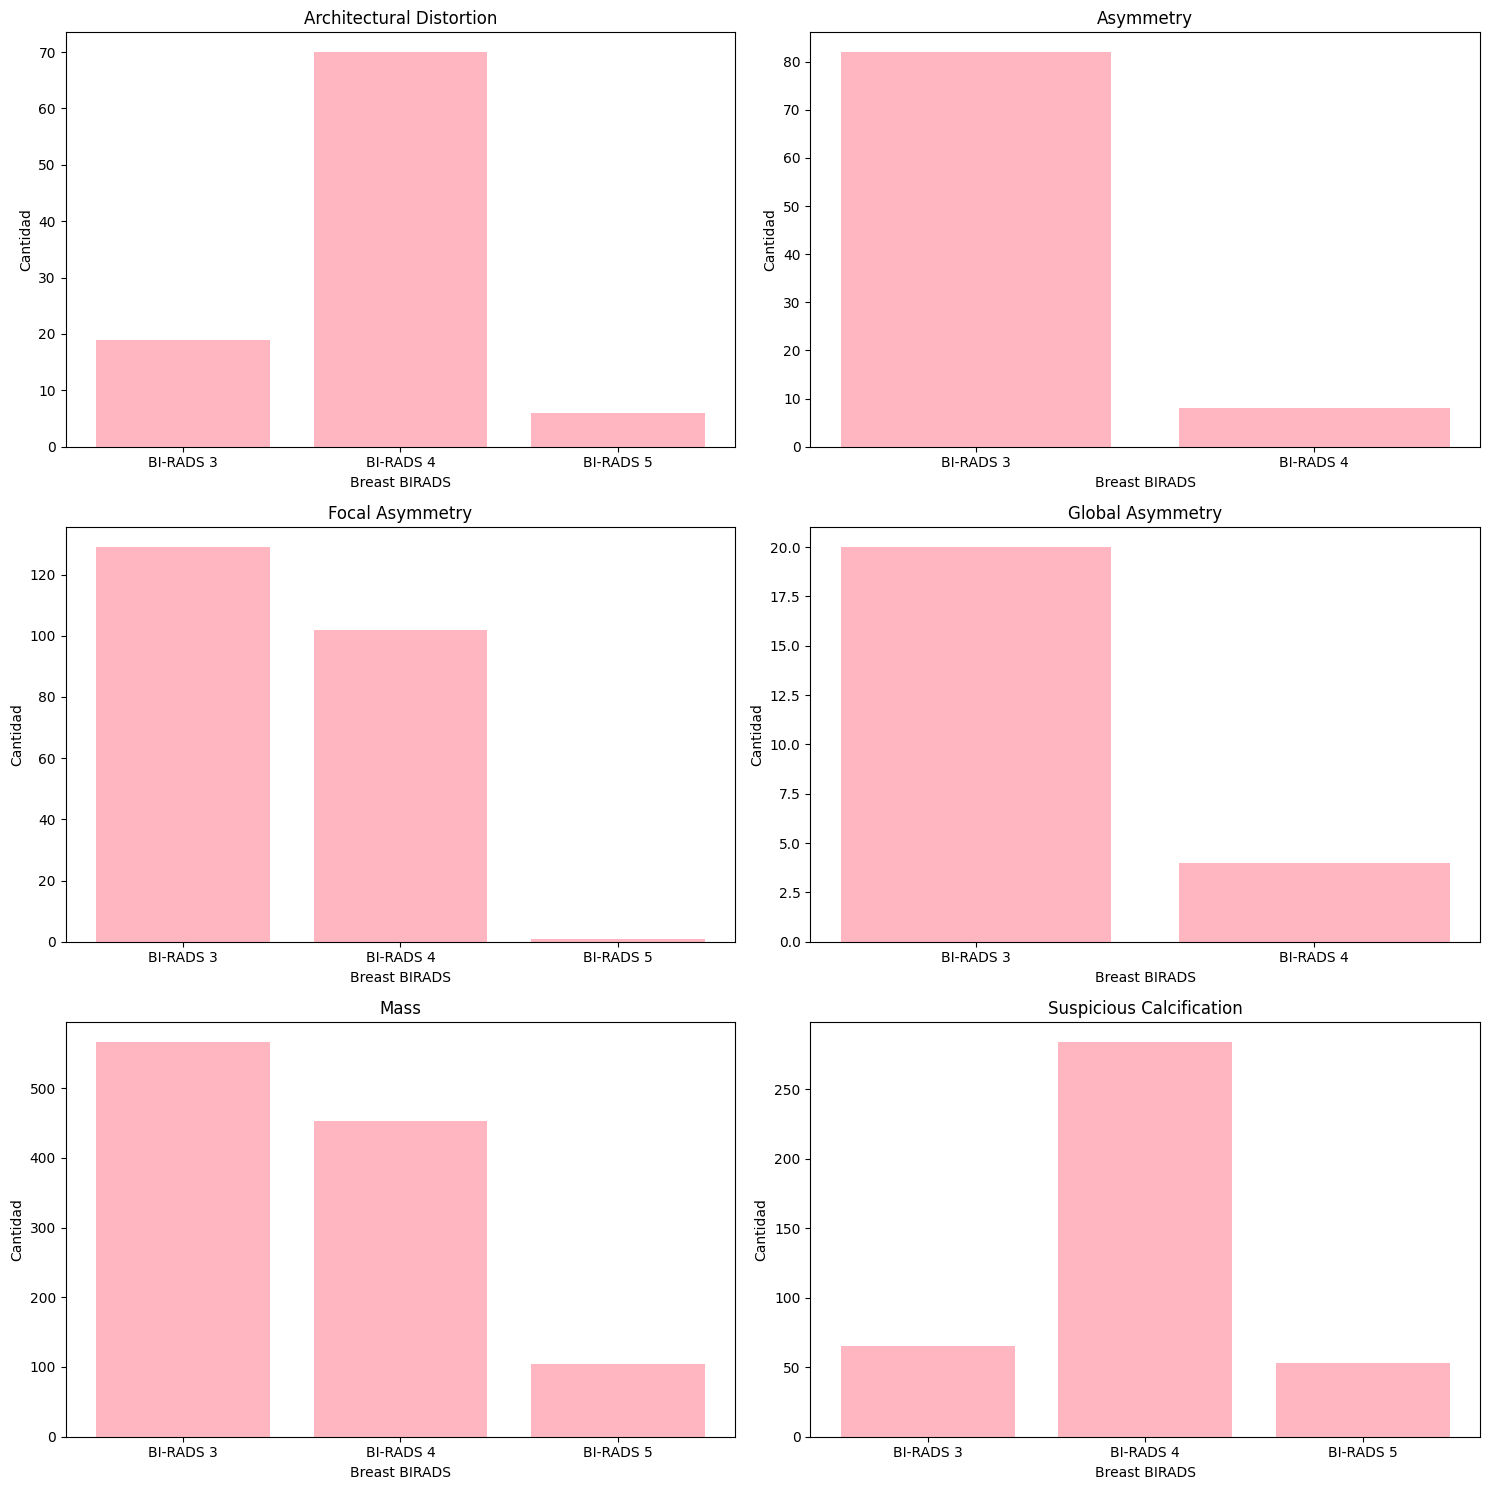

In [59]:
# Configurar la figura y los ejes para una cuadrícula de 3x2
fig, axes = plt.subplots(3, 2, figsize=(15, 15))

# Aplanar el array de ejes para facilitar el acceso
axes = axes.flatten()

# Crear un gráfico para cada hallazgo normal
for i, hallazgo in enumerate(anormal_findings):
    # Filtrar el DataFrame para incluir solo las filas donde 'finding_categories' contiene exclusivamente el hallazgo actual
    df_filtrado = df[df['finding_categories'].apply(lambda x: set(x) == {hallazgo})]
    
    # Verificar si df_filtrado no está vacío
    if not df_filtrado.empty:
        # Contar las ocurrencias en 'breast_birads'
        conteo_birads = df_filtrado['finding_birads'].value_counts().sort_index()
        
        # Graficar los resultados en el subplot correspondiente
        axes[i].bar(conteo_birads.index, conteo_birads.values, color='lightpink')
        axes[i].set_title(f"{hallazgo}")
        axes[i].set_xlabel("Breast BIRADS")
        axes[i].set_ylabel("Cantidad")
        axes[i].tick_params(axis='x', rotation=0)
    else:
        axes[i].text(0.5, 0.5, f"No datos para: {hallazgo}", 
                     ha='center', va='center', fontsize=12, color='red')
        axes[i].set_title(f"H. Normal: {hallazgo}")



# Ajustar el layout
plt.tight_layout()
plt.show()

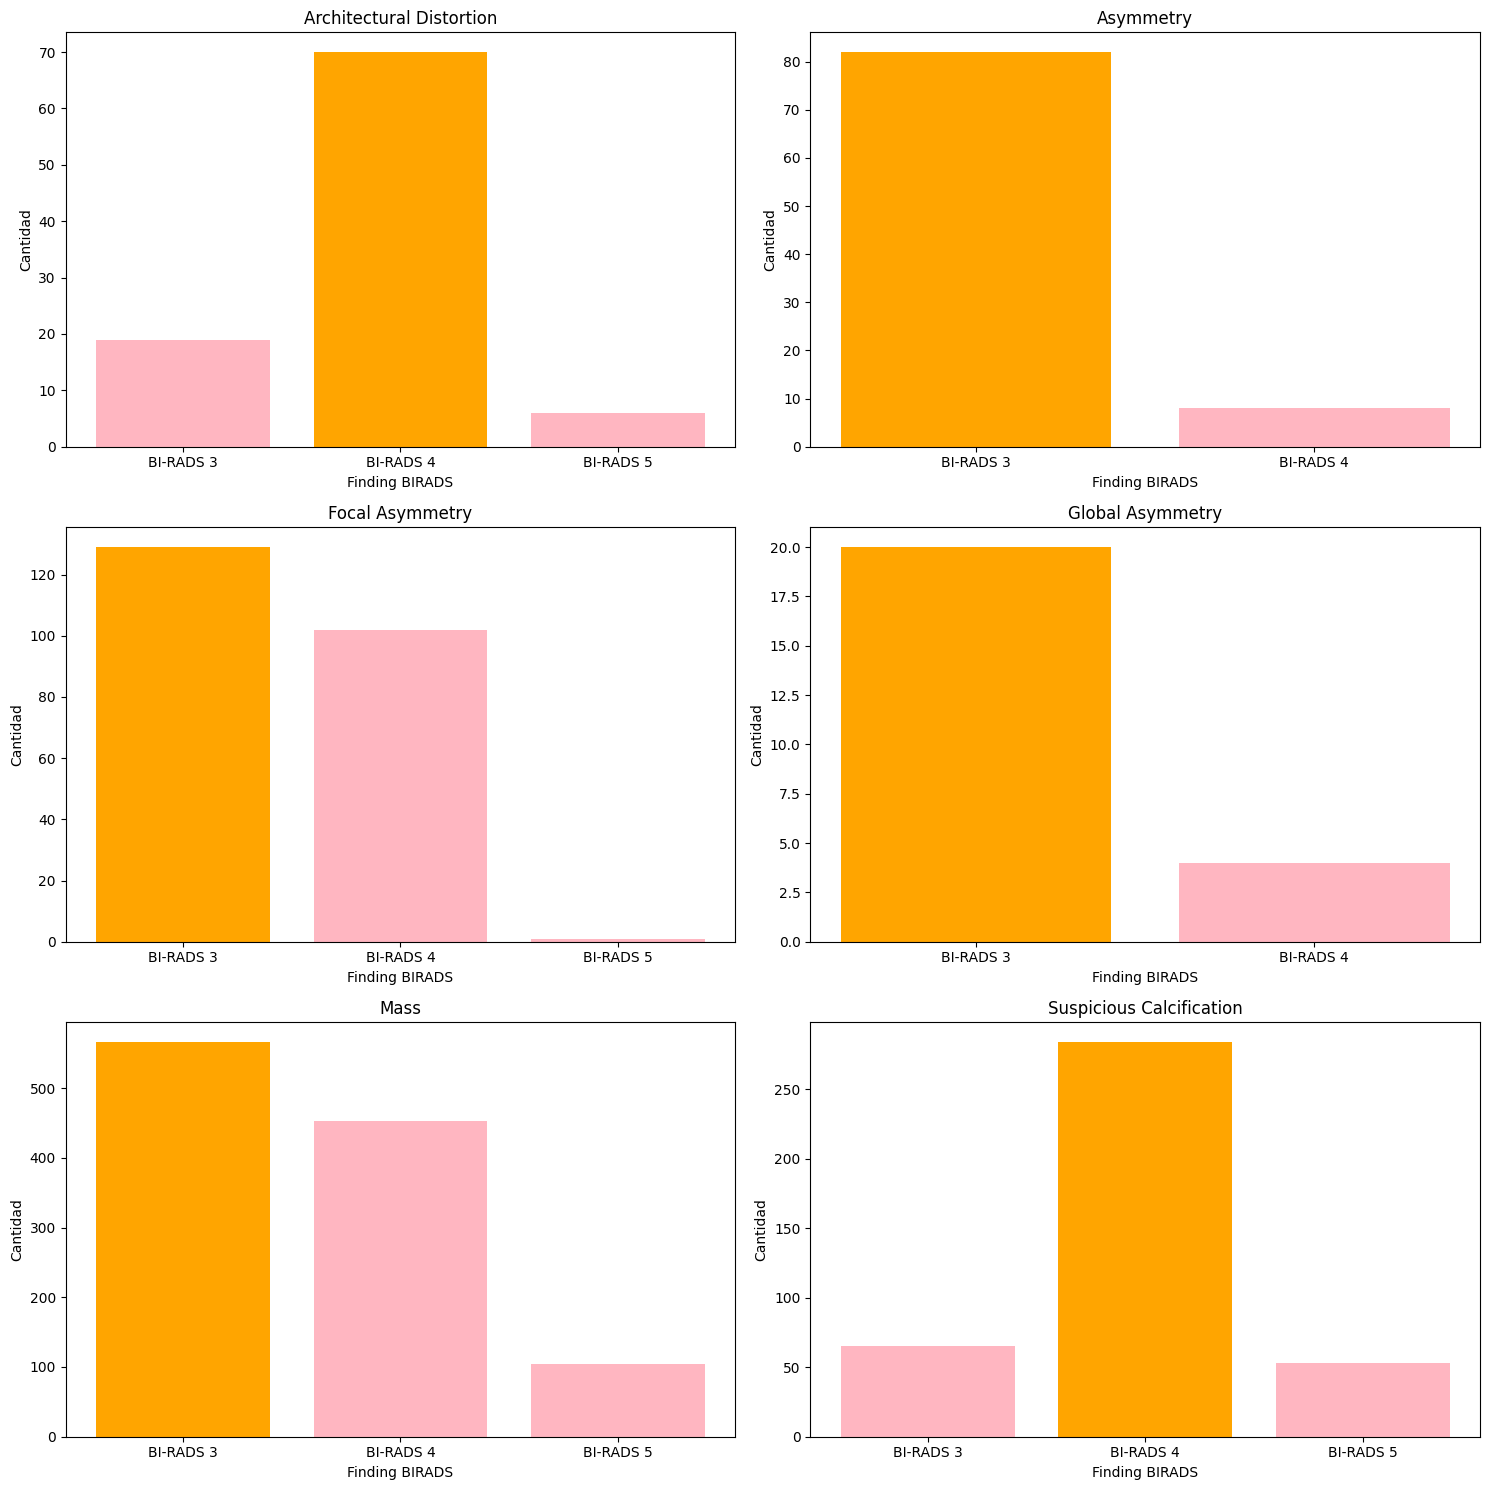

In [66]:
fig, axes = plt.subplots(3, 2, figsize=(15, 15))

axes = axes.flatten()

for i, hallazgo in enumerate(anormal_findings):
    df_filtrado = df[df['finding_categories'].apply(lambda x: set(x) == {hallazgo})]
    

    if not df_filtrado.empty:

        conteo_birads = df_filtrado['finding_birads'].value_counts().sort_index()
        
        max_value = conteo_birads.max()
        colors = ['orange' if value == max_value else 'lightpink' for value in conteo_birads.values]
        
        axes[i].bar(conteo_birads.index, conteo_birads.values, color=colors)
        axes[i].set_title(f"{hallazgo}")
        axes[i].set_xlabel("Finding BIRADS")
        axes[i].set_ylabel("Cantidad")
        axes[i].tick_params(axis='x', rotation=0)
    else:
        axes[i].text(0.5, 0.5, f"No datos para: {hallazgo}", 
                     ha='center', va='center', fontsize=12, color='green')
        axes[i].set_title(f"H. Normal: {hallazgo}")

plt.tight_layout()
plt.show()

#### Relación Detecciones y Síntomas ####

Más adelante vemos las descripciones de las detecciones.

In [ ]:
df = 

In [77]:
resultados = {}
for birads, grupo in df.groupby('breast_birads'):
    # Contar la frecuencia de cada categoría en 'finding_categories'
    conteo = grupo['finding_categories'].explode().value_counts()
    
    # Obtener la categoría más común
    categoria_mas_comun = conteo.idxmax()
    frecuencia = conteo.max()
    
    # Almacenar el resultado en el diccionario
    resultados[birads] = {'Categoría': categoria_mas_comun, 'Frecuencia': frecuencia}

# Convertir el diccionario a un DataFrame para una mejor visualización
df_resultados = pd.DataFrame(resultados).transpose()
print(df_resultados)

                Categoría Frecuencia
BI-RADS 1  ['No Finding']      13406
BI-RADS 2  ['No Finding']       4664
BI-RADS 3        ['Mass']        528
BI-RADS 4        ['Mass']        445
BI-RADS 5        ['Mass']        150


In [81]:
asus = anormal_findings + sus

Solo vemos datos en xmin, ymin, xmax, ymax en categorias distintas a la de "No Finding"

### Descripción Regiones ###

Podemos ver que solo hay datos en xmin, ymin, xmax e ymax en categorías de distintas de 'No Findings'. Podemos ver que hay hallazgos de cosas aunque sean síntomas de BI-RADS 2.

Como trabajamos con mama, veremos cuantas zonas hay detectadas.




### Detecciones por Mama ###

In [32]:
grouped = df.groupby(['study_id', 'laterality', ])

unique_xmax_counts = grouped['xmax'].nunique()

detections_count = unique_xmax_counts.value_counts().sort_index()

detections_table = detections_count.reset_index()
detections_table.columns = ['Número de valores únicos de xmax', 'Cantidad de mamas']


print("Tabla de cantidad de mamas por número de valores únicos de xmax:")
print(detections_table)


max_xmax_count = unique_xmax_counts.idxmax()
max_xmax_value = unique_xmax_counts.max()

study_id_with_max_xmax, laterality_with_max_xmax = max_xmax_count

print(f'La mama con mayor detecciones es:')
print(f'study_id: {study_id_with_max_xmax}')
print(f'Laterality: {laterality_with_max_xmax}')

Tabla de cantidad de mamas por número de valores únicos de xmax:
    Número de valores únicos de xmax  Cantidad de mamas
0                                  0               9033
1                                  1                159
2                                  2                606
3                                  3                 58
4                                  4                 87
5                                  5                 21
6                                  6                 17
7                                  7                  7
8                                  8                  9
9                                  9                  1
10                                10                  1
11                                12                  1
La mama con mayor detecciones es:
study_id: 6d4cd11574ad3598cca9b228bcfcc024
Laterality: L


### Detecciones por Mamografía ###

In [35]:
grouped = df.groupby(['study_id', 'laterality', 'view_position'])
unique_xmax_counts = grouped['xmax'].nunique()

detections_count = unique_xmax_counts.value_counts().sort_index()

detections_table = detections_count.reset_index()
detections_table.columns = ['Número de valores únicos de xmax', 'Cantidad de mamografías']

print("Tabla de cantidad de mamas por número de valores únicos de xmax:")
print(detections_table)


max_xmax_count = unique_xmax_counts.idxmax()
max_xmax_value = unique_xmax_counts.max()

print(f'La mamogrfía con mayor detecciones es:')
print(f'study_id: {study_id_with_max_xmax}')
print(f'Laterality: {laterality_with_max_xmax}')
print(f'Vista: {view_with_max_xmax}')


Tabla de cantidad de mamas por número de valores únicos de xmax:
   Número de valores únicos de xmax  Cantidad de mamografías
0                                 0                    18231
1                                 1                     1430
2                                 2                      239
3                                 3                       63
4                                 4                       27
5                                 5                        7
6                                 6                        1
7                                 7                        1
La mamogrfía con mayor detecciones es:
study_id: 6d4cd11574ad3598cca9b228bcfcc024
Laterality: L
Vista: MLO


#### Cantidad de Columnas con solo un Síntoma ####

In [37]:

# Filtrar las filas donde 'finding_categories' tiene solo un elemento
df_unico_elemento = df[df['finding_categories'].apply(lambda x: len(x) == 1)].copy()

# Extraer el único elemento de la lista en 'finding_categories'
df_unico_elemento.loc[:, 'finding_category_unico'] = df_unico_elemento['finding_categories'].apply(lambda x: x[0])

# Contar la cantidad de ocurrencias de cada valor en 'finding_category_unico'
conteo_finding_category = df_unico_elemento['finding_category_unico'].value_counts()

# Convertir la serie en un DataFrame para mejor visualización
tabla_resultado = conteo_finding_category.reset_index()
tabla_resultado.columns = ['Finding Category', 'Cantidad']

# Mostrar la tabla
print(tabla_resultado)

            Finding Category  Cantidad
0                 No Finding     18232
1                       Mass      1123
2   Suspicious Calcification       402
3            Focal Asymmetry       232
4   Architectural Distortion        95
5                  Asymmetry        90
6      Suspicious Lymph Node        57
7            Skin Thickening        38
8           Global Asymmetry        24
9          Nipple Retraction        12
10           Skin Retraction         7


 ### *Densidad del seno y BI-Rads* ###


Entre más densos sean sus senos, más difícil pueden ser ver las áreas anormales en los mamogramas, tener senos más densos también incrementa el riesgo de llegar a tener un diagnóstico de cáncer mamario.

Se encontró una relación entre mientras más denso el tejido mayor probabilidad de riesgo de cáncer de mamas.

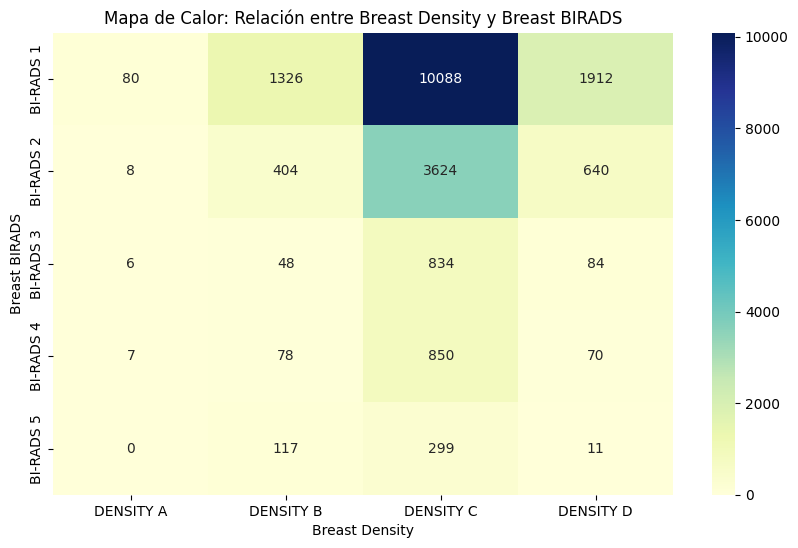

In [88]:
import seaborn as sns


# Crear una tabla de frecuencia para 'breast_density' y 'breast_birads'
tabla_frecuencia = pd.crosstab(df['breast_birads'], df['breast_density'])

# Crear el mapa de calor
plt.figure(figsize=(10, 6))
sns.heatmap(tabla_frecuencia, annot=True, fmt='d', cmap='YlGnBu')

# Configurar el título y etiquetas
plt.title('Mapa de Calor: Relación entre Breast Density y Breast BIRADS')
plt.xlabel('Breast Density')
plt.ylabel('Breast BIRADS')

# Mostrar el gráfico
plt.show()

Parte 2: Matriz de Correlación


In [1]:
import pandas as pd


#Parte a

archivo = 'finding_annotations.csv'
df = pd.read_csv(archivo)

df_subset = df[['finding_categories', 'breast_birads','finding_birads']]

df_subset['breast_birads'] = df_subset['breast_birads'].astype(str)
df_subset['finding_birads'] = df_subset['finding_birads'].astype(str)

df_subset['finding_birads'].fillna(df_subset['breast_birads'], inplace=True)

# Verifica el resultado
print(df_subset.head())


             finding_categories breast_birads finding_birads
0                      ['Mass']     BI-RADS 4      BI-RADS 4
1                      ['Mass']     BI-RADS 4      BI-RADS 4
2          ['Global Asymmetry']     BI-RADS 3      BI-RADS 3
3          ['Global Asymmetry']     BI-RADS 3      BI-RADS 3
4  ['Architectural Distortion']     BI-RADS 4      BI-RADS 4


C:\Users\conyc\AppData\Local\Temp\ipykernel_18808\497348767.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_subset['breast_birads'] = df_subset['breast_birads'].astype(str)
C:\Users\conyc\AppData\Local\Temp\ipykernel_18808\497348767.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_subset['finding_birads'] = df_subset['finding_birads'].astype(str)
C:\Users\conyc\AppData\Local\Temp\ipykernel_18808\497348767.py:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series thr

In [14]:
# Explota la columna 'finding_categories' para separar los valores de la lista en filas
df_exploded = df_subset.explode('finding_categories')

def convertir_birads(birads):
    return int(birads.split(' ')[-1])

# Aplicar la función a la columna 'finding_birads'
df_exploded['finding_birads_numeric'] = df_exploded['finding_birads'].apply(convertir_birads)

# Verifica el resultado
print(df_exploded.head())

AttributeError: 'float' object has no attribute 'split'